## $\color{SkyBlue}{\text{Establishing Year Analysis}}$
#### $\color{SkyBlue}{\text{Roman Lynch}}$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [2]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [3]:
#--------------------------------------------------------------------------------#
def kMeans(df, k=4, tol=0.005): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))
    centroids = df.sample(k).values
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [22]:
#--------------------------------------------------------------------------------#
# Creating the master data frame

## Read in CSV files
df_rankings = pd.read_csv("data/rankings.csv")
df_teams = pd.read_csv("data/team.csv")

## Only take important columns
df_rankings = df_rankings[['Team', 'Rank', 'Year']]
df_teams = df_teams[['full_name', 'abbreviation', 'city', 'year_founded']]

## Clean "*" from all teams in df_rankings
for i in range(len(df_rankings)):
    if (df_rankings["Team"].iloc[i].find('*')):
        df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')

## Create the master dataframe by including year_founded, city, team, and rank
df_master = pd.merge(df_rankings,df_teams, left_on="Team", right_on="full_name")
df_master['years_since_founding'] = (df_master['Year'] - df_master['year_founded']).astype(int)
#--------------------------------------------------------------------------------#

print(df_master.head(5))


             Team  Rank  Year       full_name abbreviation    city  \
0  Denver Nuggets     1  2023  Denver Nuggets          DEN  Denver   
1  Denver Nuggets     6  2022  Denver Nuggets          DEN  Denver   
2  Denver Nuggets     4  2021  Denver Nuggets          DEN  Denver   
3  Denver Nuggets     3  2020  Denver Nuggets          DEN  Denver   
4  Denver Nuggets     2  2019  Denver Nuggets          DEN  Denver   

   year_founded  years_since_founding  
0        1976.0                    47  
1        1976.0                    46  
2        1976.0                    45  
3        1976.0                    44  
4        1976.0                    43  


In [14]:
#--------------------------------------------------------------------------------#
# Break the data up by year
df_16 = df_master[df_master["Year"] == 2016]
df_17 = df_master[df_master["Year"] == 2017]
df_18 = df_master[df_master["Year"] == 2018]
df_19 = df_master[df_master["Year"] == 2019]
df_20 = df_master[df_master["Year"] == 2020]
df_21 = df_master[df_master["Year"] == 2021]
df_22 = df_master[df_master["Year"] == 2022]
df_23 = df_master[df_master["Year"] == 2023]

print(df_16.shape[0])
print(df_17.shape[0])
print(df_18.shape[0])
print(df_19.shape[0])
print(df_20.shape[0])
print(df_21.shape[0])
print(df_22.shape[0])
print(df_23.shape[0])
#--------------------------------------------------------------------------------#

30
30
30
30
30
30
30
30


$\rule{27cm}{0.4pt}$ 
### Perform K-means with k = 3

In [16]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering withk = 3
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "years_since_founding"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "years_since_founding"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "years_since_founding"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "years_since_founding"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "years_since_founding"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "years_since_founding"]], k=3)
centroids_17, clusters_17, mean_error_17 = kMeans(df_17[["Rank", "years_since_founding"]], k=3)
centroids_16, clusters_16, mean_error_16 = kMeans(df_16[["Rank", "years_since_founding"]], k=3)
#--------------------------------------------------------------------------------#

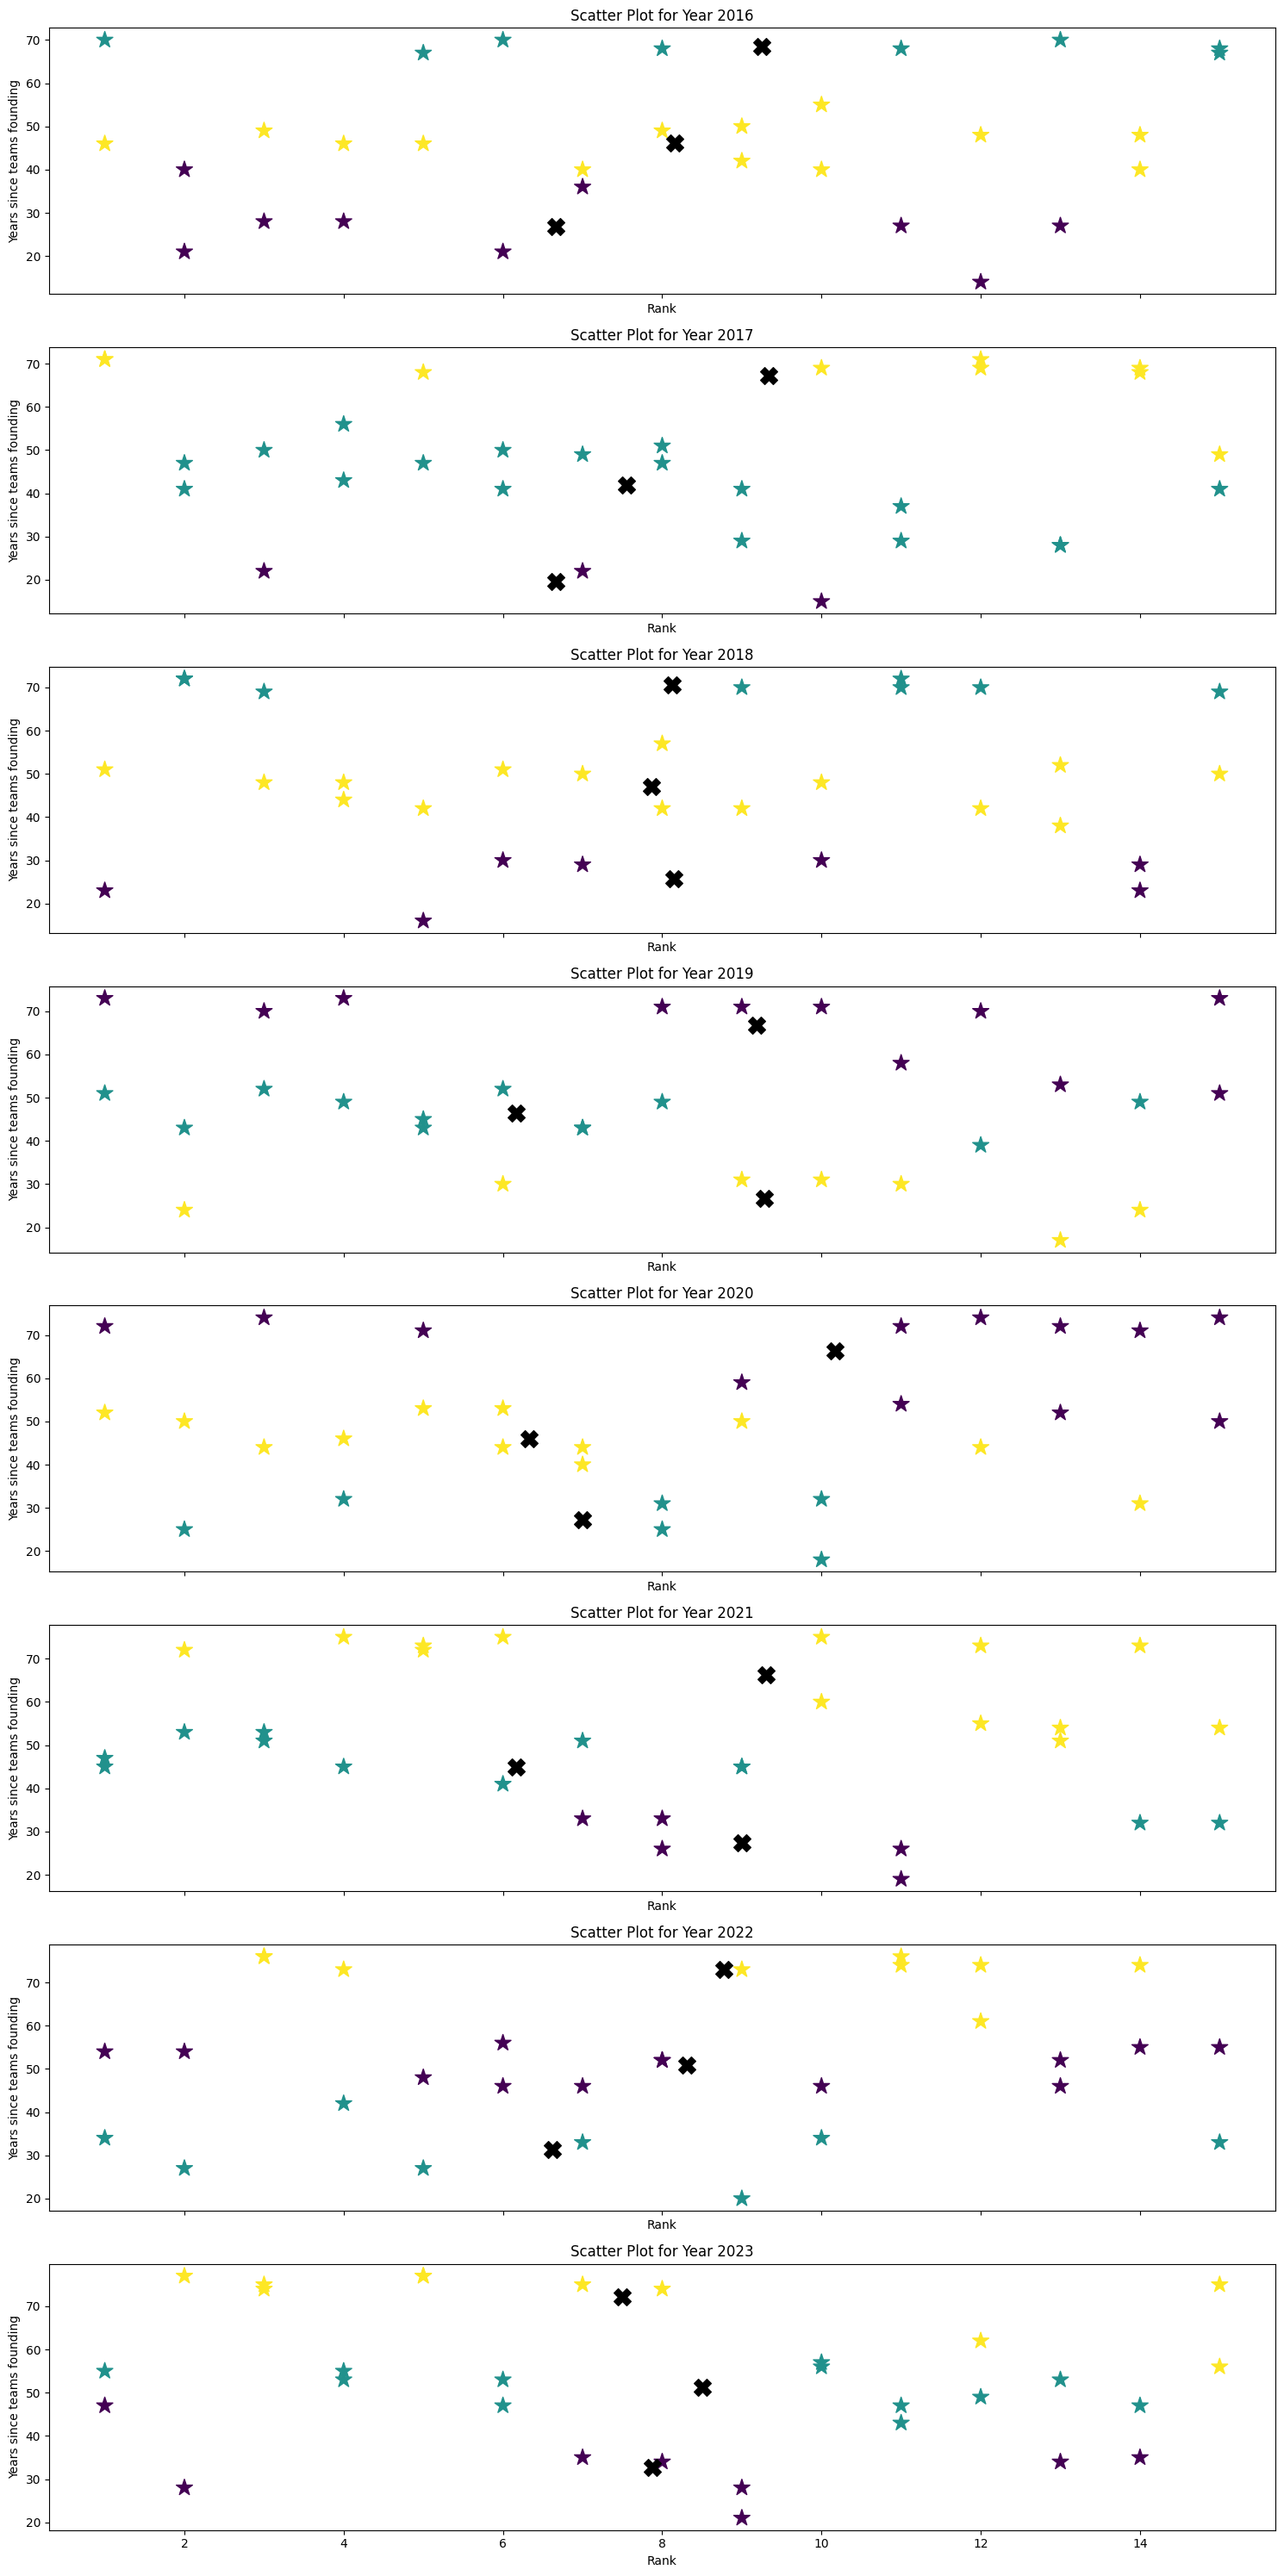

In [21]:
#--------------------------------------------------------------------------------#
# Organize output
dataframes = [df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_16, clusters_17, clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
centroids = [centroids_16, centroids_17, centroids_18,centroids_19,centroids_20, centroids_21, centroids_22, centroids_23]
#--------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------#
# Plot the data

## Initialize Plot
fig, axes = plt.subplots(8, 1, figsize=(15, 30), sharex=True)

## Loop: Scatter Plot for each Year
for i, (year, dataframe, cluster) in enumerate(zip(years, dataframes, clusters)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['years_since_founding'], c=cluster, marker='*', s=200)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Years since teams founding")
    ax.set_title("Scatter Plot for Year " + str(year))
    ## Plot centroids
    ax.scatter(centroids[i][:, 0], centroids[i][:, 1], marker='X', s=200, c='black')

plt.tight_layout()
plt.show()

plt.show()
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Analysis

As evident by the above scatterplots, there does not appear to be a correlation between the years since the team has been established, and their final rank.

Our hypothesis was that teams that had been around longer, had an advantage over those who did not. For example, more longer established teams would have a higher fan base. They would also likely have more money, and attract more talented players and coaches. If this were to be the case we would see three clusters:
1. High year, high rank
2. Medium year, medium rank
3. Low year, low rank

Across all the scatterplots, this does not appear to be the case. As a result we can conclude that there is no correlation between the years since the team has been established, and their final rank.